In [72]:
import pandas as pd
import numpy as np

In [73]:
df = pd.DataFrame()

In [74]:
df1 = pd.read_csv("2022P.csv");
df2 = pd.read_csv("2022BA.csv");
df3 = pd.read_csv("2021BA.csv");

In [75]:
drame = [df1, df2, df3]

In [76]:
df = pd.concat(drame);

In [77]:
df.head()


,Date,Description,Amount
0,30/12/2022,TFL TRAVEL CHARGE TFL.GOV.UK/CP,2.50
1,30/12/2022,TRAINLINE.COM LONDON,21.10
2,27/12/2022,3CPAYMENT*PRET A MANGER LONDON,7.95
3,27/12/2022,TFL TRAVEL CHARGE TFL.GOV.UK/CP,2.50
4,27/12/2022,TRAINLINE.COM LONDON,14.95


In [78]:
df


,Date,Description,Amount
0,30/12/2022,TFL TRAVEL CHARGE TFL.GOV.UK/CP,2.50
1,30/12/2022,TRAINLINE.COM LONDON,21.10
2,27/12/2022,3CPAYMENT*PRET A MANGER LONDON,7.95
3,27/12/2022,TFL TRAVEL CHARGE TFL.GOV.UK/CP,2.50
4,27/12/2022,TRAINLINE.COM LONDON,14.95
...,...,...,...
129,04/10/2021,TFL TRAVEL CHARGE TFL.GOV.UK/CP,3.10
130,03/10/2021,ASDA STORES FELTHAM,3.85
131,03/10/2021,TFL TRAVEL CHARGE TFL.GOV.UK/CP,3.10
132,02/10/2021,APPLE.COM/UK LONDON,159.00


In [79]:
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [80]:
df.head()

,Date,Description,Amount
0,2022-12-30,TFL TRAVEL CHARGE TFL.GOV.UK/CP,2.50
1,2022-12-30,TRAINLINE.COM LONDON,21.10
2,2022-12-27,3CPAYMENT*PRET A MANGER LONDON,7.95
3,2022-12-27,TFL TRAVEL CHARGE TFL.GOV.UK/CP,2.50
4,2022-12-27,TRAINLINE.COM LONDON,14.95


In [81]:
df

,Date,Description,Amount
0,2022-12-30,TFL TRAVEL CHARGE TFL.GOV.UK/CP,2.50
1,2022-12-30,TRAINLINE.COM LONDON,21.10
2,2022-12-27,3CPAYMENT*PRET A MANGER LONDON,7.95
3,2022-12-27,TFL TRAVEL CHARGE TFL.GOV.UK/CP,2.50
4,2022-12-27,TRAINLINE.COM LONDON,14.95
...,...,...,...
129,2021-10-04,TFL TRAVEL CHARGE TFL.GOV.UK/CP,3.10
130,2021-10-03,ASDA STORES FELTHAM,3.85
131,2021-10-03,TFL TRAVEL CHARGE TFL.GOV.UK/CP,3.10
132,2021-10-02,APPLE.COM/UK LONDON,159.00


In [82]:
import matplotlib.pyplot as plt


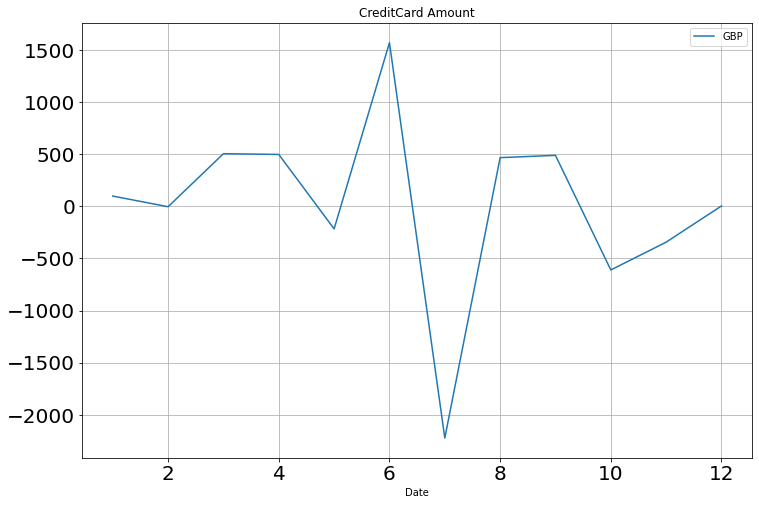

In [83]:
df.groupby(df.Date.dt.month)['Amount'].sum().plot(figsize=(12, 8), title="CreditCard Amount", fontsize=20, label="GBP",)
plt.legend()
plt.grid()
plt.show()

In [84]:
df.count()

Date           856
Description    856
Amount         856
dtype: int64

In [85]:
dfexpenses = df[df['Amount']>0]
dfexpenses = dfexpenses.groupby('Date').sum()

dfpayment = df[df['Amount']<0]
dfpayment = dfpayment.groupby('Date').sum()


In [86]:
dfexpenses.dtypes


Amount    float64
dtype: object

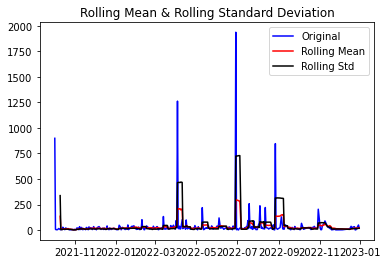

In [87]:
rolling_mean = dfexpenses['Amount'].rolling(window = 7).mean()
rolling_std = dfexpenses['Amount'].rolling(window = 7).std()
plt.plot(dfexpenses['Amount'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

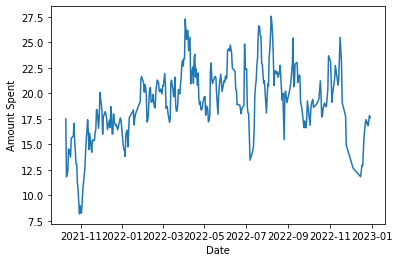

In [88]:
#smoothing because of noise
plt.xlabel('Date')
plt.ylabel('Amount Spent')
plt.plot(np.log(dfexpenses[['Amount']]).rolling(7).sum())

In [89]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm

In [90]:
result = adfuller(dfexpenses[['Amount']])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -19.61612270797732
p-value: 0.0
Critical Values:
	1%: -3.4500219858626227
	5%: -2.870206553997666
	10%: -2.571387268879483


ADF Statistic: -8.176467112328824
p-value: 8.351221998421678e-13
Critical Values:
	1%: -3.450951662384033
	5%: -2.8706147570800784
	10%: -2.571604931640625


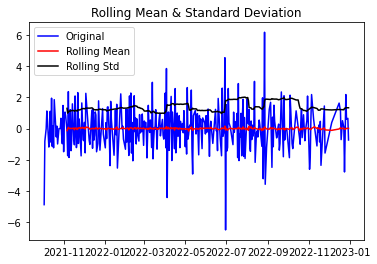

In [91]:
df_log_shift = np.log(dfexpenses[['Amount']]) - np.log(dfexpenses[['Amount']]).shift(1)
df_log_shift.dropna(inplace=True)
result = adfuller(df_log_shift)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
    
# rolling statistics
rolling_mean = df_log_shift.rolling(window=30).mean()
rolling_std = df_log_shift.rolling(window=30).std()
    
    # rolling statistics plot
original = plt.plot(df_log_shift, color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
#no unit root stationart
#rolling mean close to 0
#d value is 1

In [92]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


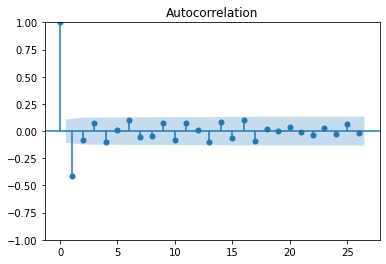

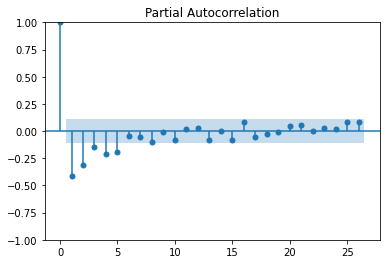

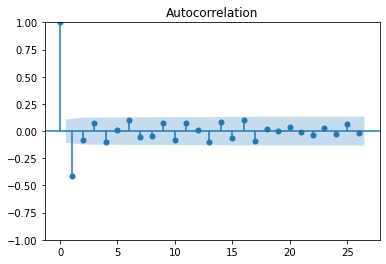

In [93]:
plot_pacf(df_log_shift)
plot_acf(df_log_shift)

In [94]:
!pip install pmdarima

from pmdarima.arima import auto_arima



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [95]:

arima_model =  auto_arima(df_log_shift,start_p=1, d=1, start_q=1, 
                          max_p=8, max_d=5, max_q=8, seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1515.772, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1358.867, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1513.781, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1257.881, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1224.194, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1197.489, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1156.822, Time=0.06 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=1135.312, Time=0.08 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=1126.797, Time=0.09 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=1111.057, Time=0.11 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(8,1,0)(0,0,0)[0]             : AIC=1109.131, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(8, 1, 0)   Log Likelihood                -545.566
Date:                Wed, 05 Apr 2023   AIC                           1109.131
Time:                        00:01:26   BIC                           1143.432
Sample:                             0   HQIC                          1122.807
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4951      0.048    -30.990      0.000      -1.590      -1.401
ar.L2         -1.7482      0.082    -21.331      0.000      -1.909      -1.588
ar.L3         -1.7408      0.114    -15.307      0.000      -1.964      -1.518
ar.L4         -1.6307      0.134    -12.206      0.000      -1.893      -1.369
ar.L5         -1.3467      0.143     -9.437      0.000      -1.626      -1.067
ar.L6         -0.9165      0.125     -7.345      0.000      -1.161      -0.672
ar.L7         -0.5298      0.092     -5.728      0.000      -0.711      -0.349
ar.L8         -0.2351      0.052     -4.522      0.000      -0.337      -0.133
sigma2         1.5190      0.096     15.794      0.000       1.331       1.708
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.96
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                             0.32
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
model_arima = ARIMA(df_log_shift,order=(8,1,0))
result_arima=model_arima.fit()
print(result_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                  335
Model:                 ARIMA(8, 1, 0)   Log Likelihood                -545.566
Date:                Wed, 05 Apr 2023   AIC                           1109.131
Time:                        00:01:26   BIC                           1143.432
Sample:                             0   HQIC                          1122.807
                                - 335                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4951      0.048    -30.990      0.000      -1.590      -1.401
ar.L2         -1.7482      0.082    -21.331      0.000      -1.909      -1.588
ar.L3         -1.7408      0.114    -15.307      0.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


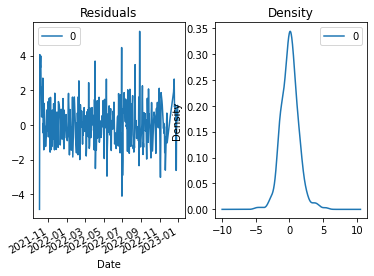

In [97]:
residuals = pd.DataFrame(result_arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [98]:
residuals.describe()


,0
count,335.000000
mean,0.046268
std,1.291809
min,-4.862319
25%,-0.732762
50%,0.010758
75%,0.752281
max,5.397167


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


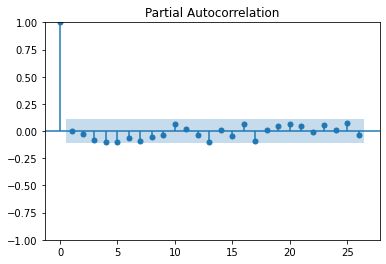

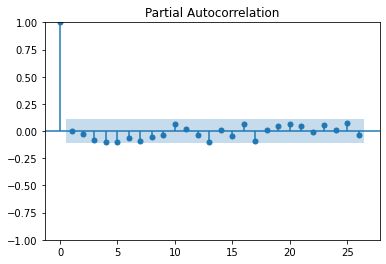

In [99]:
plot_pacf(residuals)


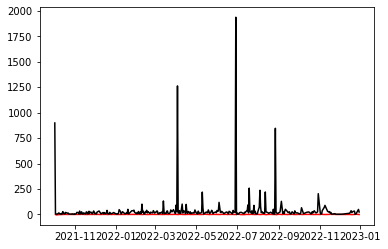

In [100]:
plotresult = result_arima.predict(dynamic=False)
plt.plot(plotresult, color='red')
plt.plot(dfexpenses, color = 'black')


In [101]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



In [102]:
# Create Training and Test
train = df_log_shift[:533]
test = df_log_shift[533:]

model_arima_train = ARIMA(train,order=(8,1,0))
result_arima_train=model_arima_train.fit()

# Forecast
fc, se, conf = result_arima_train.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Make as pandas series


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[370:], label='training')
plt.plot(test, label='actual')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.show()
print('Accuracy Matrix')
forecast_accuracy(fc, test.values)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No su

ValueError: too many values to unpack (expected 3)